<a href="https://colab.research.google.com/github/GladysJoseph/github_python_repo/blob/main/Caviar_2023_Gladys_Jospeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

In [ ]:
%matplotlib inline

import networkx as nx
import networkx as NX

from decorator import decorator
from networkx.utils import create_random_state, create_py_random_state

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To get rid of warning messages
warnings.filterwarnings('ignore')

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{ : , .2f}'.format

# Update default background style of plots
sns.set_style(style = 'darkgrid')

In [ ]:
#Mount data drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import pipe2
from pandas.compat import PY310
#@title Default title text
#uploading dataset and reading it through my drive
P1 = pd.read_csv('/content/drive/MyDrive/phase1.csv')
P2 = pd.read_csv('/content/drive/MyDrive/phase2.csv')
P3 = pd.read_csv('/content/drive/MyDrive/phase3.csv')
P4 = pd.read_csv('/content/drive/MyDrive/phase4.csv')
P5 = pd.read_csv('/content/drive/MyDrive/phase5.csv')
P6 = pd.read_csv('/content/drive/MyDrive/phase6.csv')
P7 = pd.read_csv('/content/drive/MyDrive/phase7.csv')
P8 = pd.read_csv('/content/drive/MyDrive/phase8.csv')
P9 = pd.read_csv('/content/drive/MyDrive/phase9.csv')
P10 = pd.read_csv('/content/drive/MyDrive/phase10.csv')
P11 = pd.read_csv('/content/drive/MyDrive/phase11.csv')

In [ ]:
P1.head()

,Unnamed: 0,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
0,1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
3,83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
4,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Setting first column as the index to achieve the adjacency matrix for each phase
# Defining a list with the phases
phases = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]

# Now, let us set the first column as the index for all the DataFrames
for p in phases:
    p.set_index(p.columns[0], inplace = True)

In [ ]:
P1

,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
Unnamed: 0,,,,,,,,,,,,,,,
1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now, that we have set the index, check for the consistency in column names and indices data type
P1.index, P1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Index(['1', '4', '89', '83', '3', '5', '88', '85', '90', '2', '7', '54', '6',
        '64', '8'],
       dtype='object'))

Observation:

The above output shows that the indices are of integer data type and the column names are of object data type.
Let's convert the column names to integer data types.

In [ ]:
# Let's convert the column names to integer types
phases = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]

col = []

for p in phases:                 # Running the loop for each phase (11)
    for i in p.columns:          # Running the loop for each column of each phase
        col.append(int(i))       # Appending column names to the list 'col'
    p.columns = col              # Updating the column names for each phase
    col = []                     # Reinitiating the list 'col' as an empty list

Observation:

We observe that the transformation has worked. Both, indices as well as column names, are of integer data type.
Generating Graphs
Now, that we have created the adjacency matrices, let us now try to create graphs out of these adjacency matrices.

We will use the from_pandas_adjacency function and pass the adjacency matrix for each phase as a DataFrame.

In [ ]:
graphs = []

for i, p in enumerate(phases):
    g = 'graph' + str(i + 1)

    print(g)

    g = nx.from_pandas_adjacency(p)

    graphs.append(g)

    print(g.nodes())

graph1
[5, 83, 3, 90, 88, 85, 89, 4, 8, 64, 6, 54, 7, 2, 1]
graph2
[3, 85, 83, 90, 64, 6, 2, 7, 86, 88, 89, 12, 11, 9, 76, 98, 47, 97, 56, 10, 55, 8, 5, 1]
graph3
[5, 83, 88, 48, 89, 3, 7, 6, 52, 2, 90, 86, 85, 4, 12, 51, 13, 99, 50, 107, 49, 84, 32, 11, 35, 34, 9, 76, 56, 10, 55, 8, 1]
graph4
[5, 83, 88, 90, 85, 3, 76, 47, 6, 106, 8, 7, 86, 89, 4, 15, 52, 14, 12, 31, 109, 63, 51, 13, 107, 49, 84, 53, 11, 35, 9, 2, 1]
graph5
[5, 88, 83, 6, 86, 76, 89, 3, 32, 100, 34, 11, 8, 15, 55, 2, 85, 4, 19, 82, 25, 17, 18, 108, 12, 31, 13, 84, 9, 47, 7, 1]
graph6
[3, 8, 11, 13, 84, 12, 85, 82, 15, 83, 5, 19, 25, 31, 76, 2, 4, 20, 87, 77, 78, 18, 14, 9, 6, 1]
graph7
[3, 18, 83, 81, 2, 34, 9, 14, 88, 8, 55, 17, 5, 11, 69, 12, 77, 19, 85, 4, 15, 28, 75, 16, 68, 61, 79, 74, 22, 20, 87, 78, 76, 6, 62, 1]
graph8
[3, 8, 18, 59, 84, 80, 78, 35, 14, 39, 23, 73, 12, 17, 87, 34, 83, 85, 37, 33, 16, 19, 25, 11, 76, 2, 4, 36, 91, 38, 67, 81, 28, 22, 20, 77, 82, 13, 9, 6, 86, 1]
graph9
[3, 13, 17, 29, 30, 76, 8

###**Visualizing the Graphs**
Let us now visualize the graphs that we have created above.

Note: In case you face an error while running the below code, please upgrade the decorator library, by running the following code, to resolve the error.
!pip install --upgrade decorator

****************************************************************************************
Graph for phase: 1


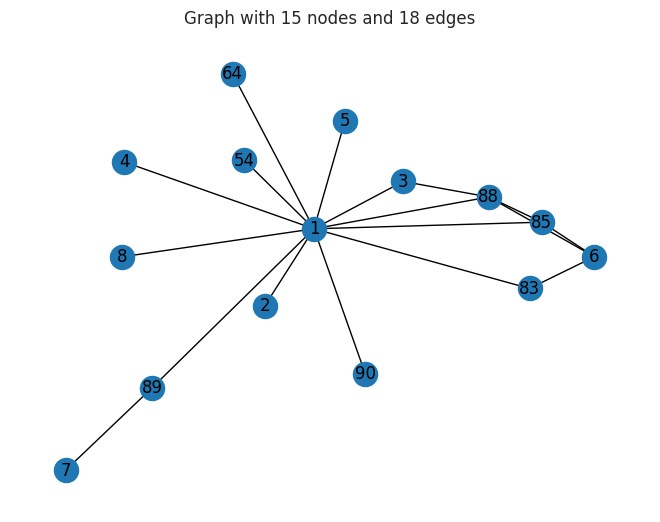

****************************************************************************************
Graph for phase: 2


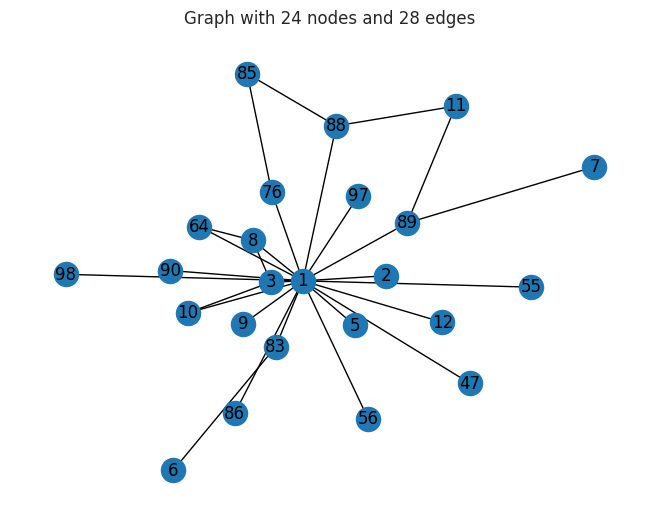

****************************************************************************************
Graph for phase: 3


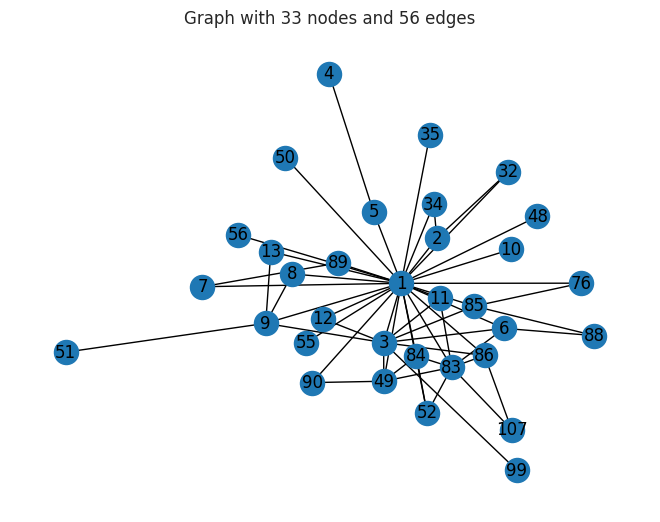

****************************************************************************************
Graph for phase: 4


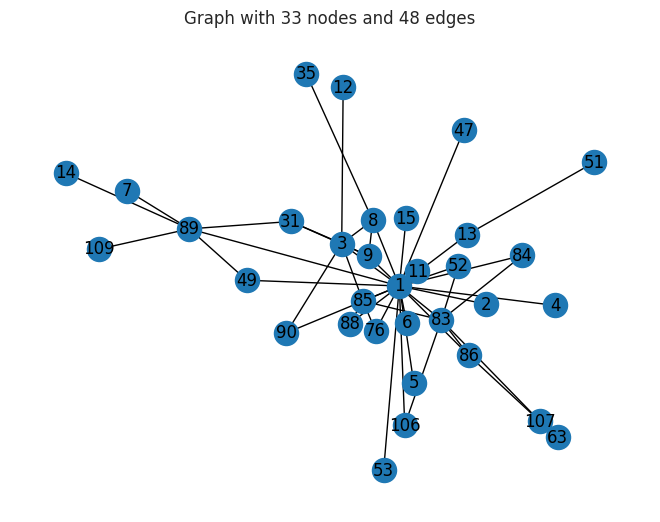

****************************************************************************************
Graph for phase: 5


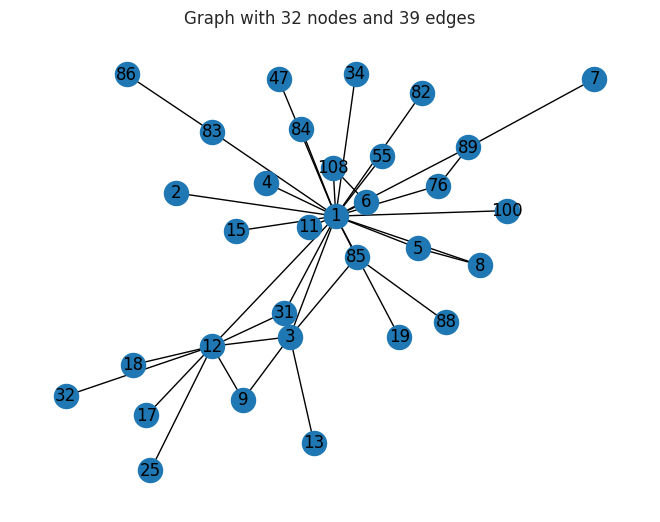

****************************************************************************************
Graph for phase: 6


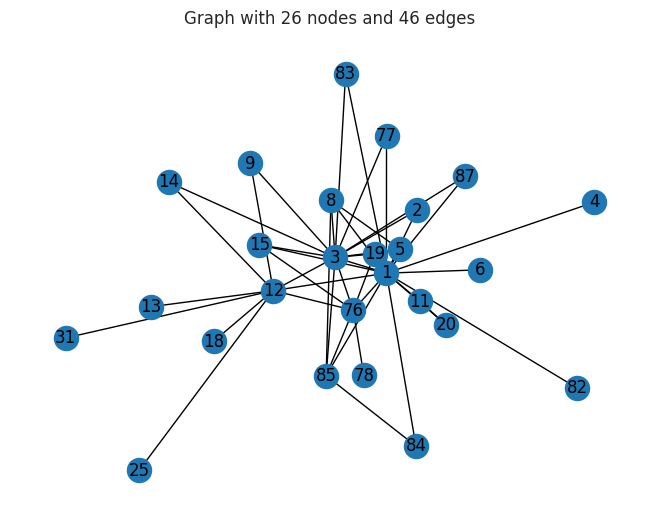

****************************************************************************************
Graph for phase: 7


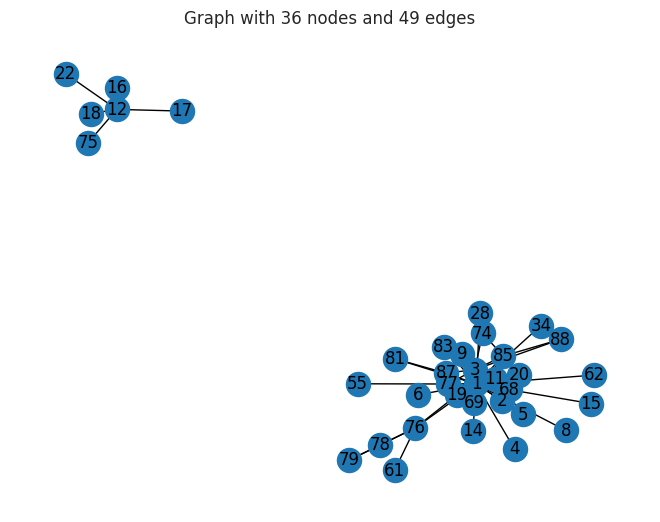

****************************************************************************************
Graph for phase: 8


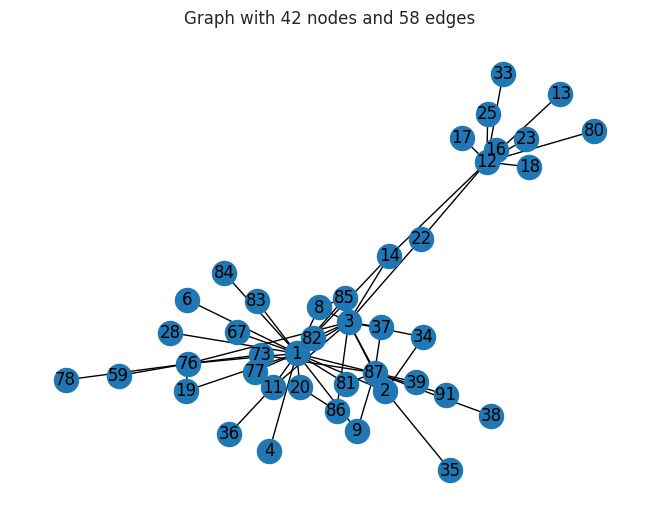

****************************************************************************************
Graph for phase: 9


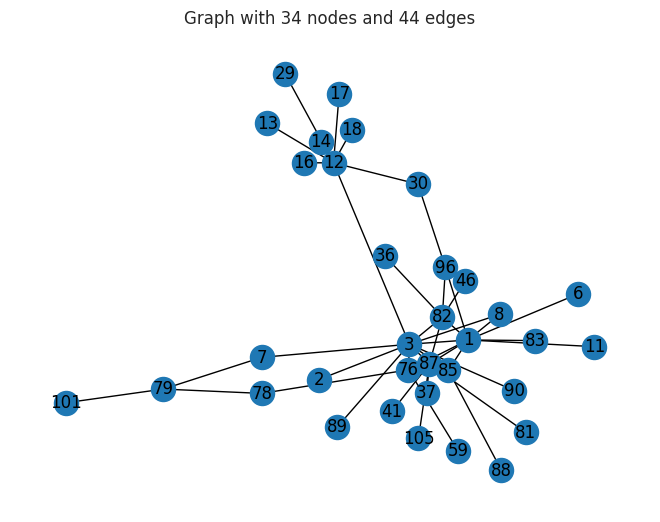

****************************************************************************************
Graph for phase: 10


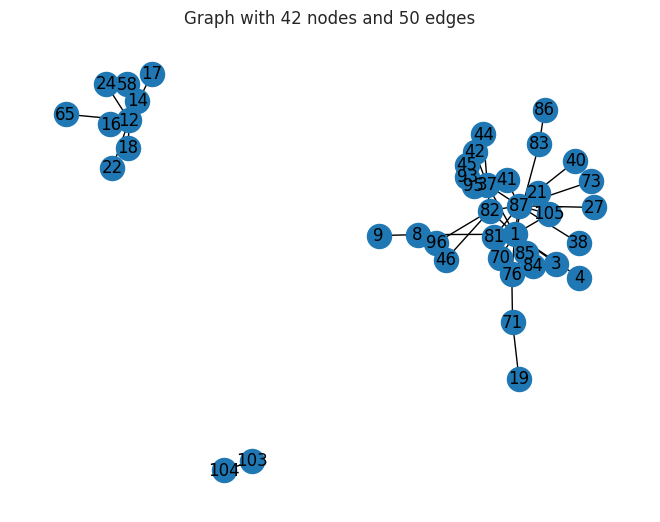

****************************************************************************************
Graph for phase: 11


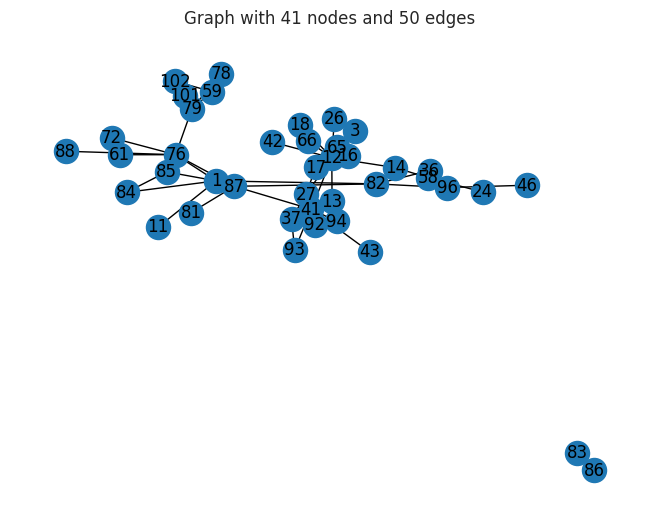

In [ ]:
for i, g in enumerate(graphs):
    print("****************************************************************************************")

    print("Graph for phase:", i + 1)

    nx.draw(g, with_labels = True)

    plt.title(str(g))

    plt.show()

###**Centrality Measures**
Let us now explore the various centrality measures for the above graphs.

a. Degree Centrality
Let us now calculate the degree centrality

In [ ]:
# Let us store the degree centralities for each node of a graph in a dictionary
deg_cen = {}

for g in graphs:
    deg_cen[g] = nx.degree_centrality(g)# Let us store the degree centralities for each node of a graph in a dictionary
deg_cen = {}


### **b. Eigenvector, Betweenness, and Closeness Centrality measures**

In [ ]:
# Let us look at the deg_cen dictionary
deg_cen

{}

In [ ]:
# Similarily, we can generate other centrality measures
# Let us try all the measures that we learnt

# Eigenvector Centrality
eig_cen = {}

for g in graphs:
    eig_cen[g] = nx.eigenvector_centrality(g)

# Betweenness Centrality
betw_cen = {}

for g in graphs:
    betw_cen[g] = nx.betweenness_centrality(g)

# Closeness Centrality
clo_cen = {}

for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

Observations:

We have now created the dictionaries with the centrality measures
The dictionaries are deg_cen, eig_cen, betw_cen, and clo_cen.
We can sort the dictionaries, in descending order, to obtain the nodes that are the most important.

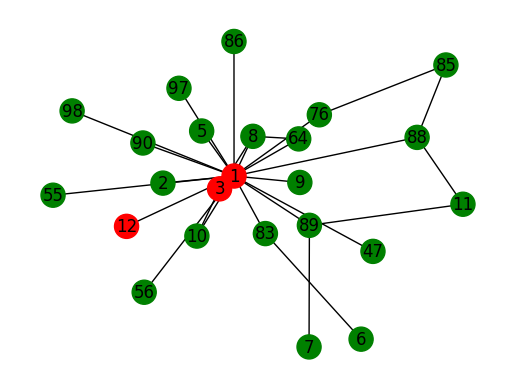

In [ ]:
from seaborn.widgets import color_palette
from networkx.algorithms.bipartite.basic import color
from ipywidgets.widgets.widget_int import Color
from networkx.classes import graph
from networkx.utils.misc import nodes_equal
from networkx.utils.decorators import nodes_or_number
# Let us now sort the degree centrality measure and identify the important nodes

##    temp_dict = {}
##        temp_dict[w] = deg_cen[g][w]
 #   print("Sorted importance of nodes in terms of deg_cen for Phase {} is {}".format(ix + 1, list(temp_dict.keys())[:5]))
 #   print()
graph2 = nx.from_pandas_adjacency(P2)

color=[]
for node in graph2:
  if (node ==1 or node == 12 or node ==3):
    color.append('red')
  else:
    color.append('green')

nx.draw_spring(graph2, node_color=color, with_labels=True, ax=plt.gca())


{24: 0.025, 96: 0.05, 61: 0.025, 79: 0.125, 82: 0.1, 46: 0.025, 26: 0.025, 94: 0.025, 87: 0.1, 18: 0.025, 17: 0.05, 14: 0.05, 88: 0.025, 83: 0.025, 65: 0.025, 66: 0.025, 92: 0.025, 72: 0.025, 102: 0.07500000000000001, 43: 0.025, 42: 0.025, 93: 0.05, 27: 0.1, 41: 0.225, 101: 0.05, 58: 0.05, 36: 0.025, 37: 0.07500000000000001, 59: 0.05, 81: 0.025, 16: 0.025, 78: 0.025, 12: 0.30000000000000004, 13: 0.05, 84: 0.05, 11: 0.025, 76: 0.17500000000000002, 86: 0.025, 85: 0.07500000000000001, 3: 0.025, 1: 0.17500000000000002}


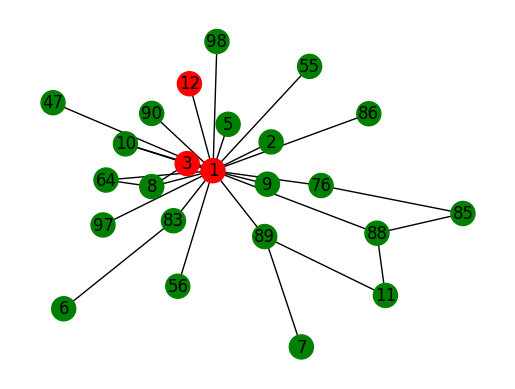

In [ ]:
from numpy.ma.core import sort
graph3 = nx.from_pandas_adjacency(P2)

for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

color=[]
for node in graph3:
  if (node ==1 or node == 12 or node ==3):
    color.append('red')
  else:
    color.append('green')

nx.draw_spring(graph3, node_color=color, with_labels=True, ax=plt.gca())
deg_centrality = nx.degree_centrality(g)


print(deg_centrality)

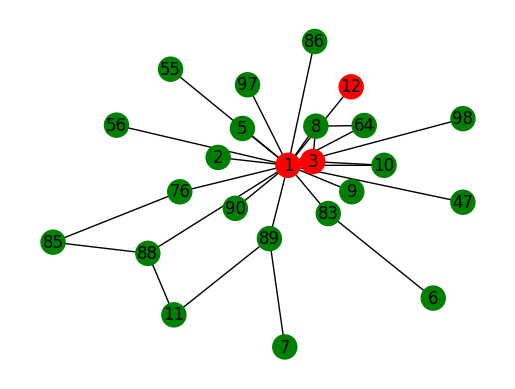

In [ ]:
graph3 = nx.from_pandas_adjacency(P2)

color=[]
for node in graph3:
  if (node ==1 or node == 12 or node ==3):
    color.append('red')
  else:
    color.append('green')

nx.draw_spring(graph3, node_color=color, with_labels=True, ax=plt.gca())

{24: 0.025, 96: 0.05, 61: 0.025, 79: 0.125, 82: 0.1, 46: 0.025, 26: 0.025, 94: 0.025, 87: 0.1, 18: 0.025, 17: 0.05, 14: 0.05, 88: 0.025, 83: 0.025, 65: 0.025, 66: 0.025, 92: 0.025, 72: 0.025, 102: 0.07500000000000001, 43: 0.025, 42: 0.025, 93: 0.05, 27: 0.1, 41: 0.225, 101: 0.05, 58: 0.05, 36: 0.025, 37: 0.07500000000000001, 59: 0.05, 81: 0.025, 16: 0.025, 78: 0.025, 12: 0.30000000000000004, 13: 0.05, 84: 0.05, 11: 0.025, 76: 0.17500000000000002, 86: 0.025, 85: 0.07500000000000001, 3: 0.025, 1: 0.17500000000000002}


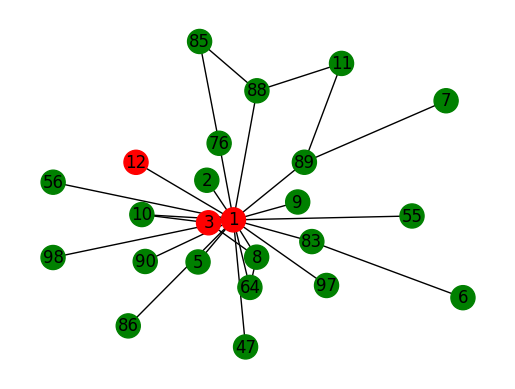

In [ ]:
from numpy.ma.core import sort
graph3 = nx.from_pandas_adjacency(P2)

for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

color=[]
for node in graph3:
  if (node ==1 or node == 12 or node ==3):
    color.append('red')
  else:
    color.append('green')

nx.draw_spring(graph3, node_color=color, with_labels=True, ax=plt.gca())
deg_centrality = nx.degree_centrality(g)


print(deg_centrality)

{24: 0.17609756097560975, 96: 0.2375, 61: 0.2524475524475524, 79: 0.2674074074074074, 82: 0.30854700854700856, 46: 0.19100529100529098, 26: 0.2635036496350365, 94: 0.2911290322580645, 87: 0.3281818181818182, 18: 0.2635036496350365, 17: 0.2674074074074074, 14: 0.2714285714285714, 88: 0.2524475524475524, 83: 0.025, 65: 0.2635036496350365, 66: 0.2635036496350365, 92: 0.2911290322580645, 72: 0.2524475524475524, 102: 0.21235294117647058, 43: 0.2911290322580645, 42: 0.2635036496350365, 93: 0.2934959349593496, 27: 0.3281818181818182, 41: 0.4149425287356322, 101: 0.21111111111111108, 58: 0.21488095238095237, 36: 0.2344155844155844, 37: 0.2983471074380165, 59: 0.21111111111111108, 81: 0.245578231292517, 16: 0.2635036496350365, 78: 0.20988372093023255, 12: 0.361, 13: 0.3223214285714286, 84: 0.2911290322580645, 11: 0.2888, 76: 0.34056603773584904, 86: 0.025, 85: 0.3139130434782608, 3: 0.2635036496350365, 1: 0.4102272727272727}


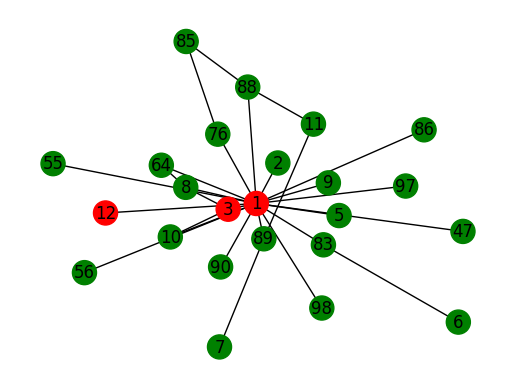

In [ ]:
from networkx.algorithms.bipartite.centrality import closeness_centrality
for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

color=[]
for node in graph3:
  if (node ==1 or node == 12 or node ==3):
    color.append('red')
  else:
    color.append('green')

nx.draw_spring(graph3, node_color=color, with_labels=True, ax=plt.gca())
close_centrality = nx.degree_centrality(g)


closeness_centrality = nx.closeness_centrality(g)

# G is the Karate Social Graph
print(closeness_centrality)

{24: 0.0, 96: 0.047435897435897434, 61: 0.0, 79: 0.17884615384615385, 82: 0.1371794871794872, 46: 0.0, 26: 0.0, 94: 0.0, 87: 0.07051282051282051, 18: 0.0, 17: 0.0, 14: 0.09230769230769231, 88: 0.0, 83: 0.0, 65: 0.0, 66: 0.0, 92: 0.0, 72: 0.0, 102: 0.000641025641025641, 43: 0.0, 42: 0.0, 93: 0.0, 27: 0.023931623931623933, 41: 0.554059829059829, 101: 0.0, 58: 0.047435897435897434, 36: 0.0, 37: 0.0010683760683760683, 59: 0.0, 81: 0.0, 16: 0.0, 78: 0.0, 12: 0.42991452991452994, 13: 0.0, 84: 0.0, 11: 0.0, 76: 0.33205128205128204, 86: 0.0, 85: 0.0057692307692307696, 3: 0.0, 1: 0.5262820512820513}


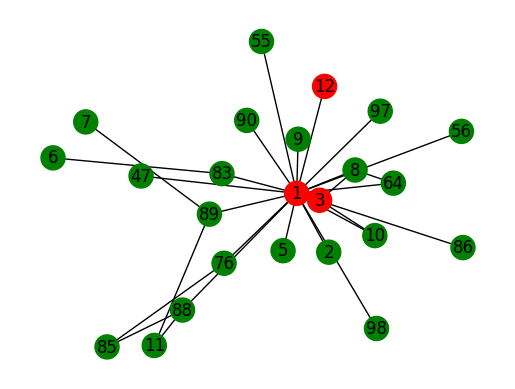

In [ ]:
###combine closeness, betweenness and close centality
from networkx.algorithms.bipartite.centrality import closeness_centrality
for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

color=[]
for node in graph3:
  if (node ==1 or node == 12 or node ==3):
    color.append('red')
  else:
    color.append('green')

nx.draw_spring(graph3, node_color=color, with_labels=True, ax=plt.gca())
bet_centrality = nx.betweenness_centrality(g)
bet_centrality = nx.betweenness_centrality(g, normalized = True, endpoints = False)
print (bet_centrality)
# G is the Karate Social Graph, parameters normalized
# and endpoints ensure whether we normalize the value
# and consider the endpoints respectively.


Understanding the variation of node importance across phases
From the above analysis, we figure out that some nodes appear to be more important than others, and we will focus our attention on analyzing those nodes.

Let us take out Node1, Node3, and Node12 and visualize their importance across phases. We will look at the betweenness and degree centrality only. You are encouraged to try out the same for other measures.

In [ ]:
# Let us first start with node 1

# Node 1
node1_deg = []

phases = []

for ix, g in enumerate(graphs):
    node1_deg.apppend(deg_cen[g][1]*100)

    phases.append(ix + 1)

node1_bet = []

for ix, g in enumerate(graphs):
    node1_bet.append(betw_cen[g][1]*100)

# Now, let us calculate the same for node 3 and 12 as well

# Node 3
node3_deg = []

for ix, g in enumerate(graphs):
    node3_deg.append(deg_cen[g][3]*100)

node3_bet = []

for ix, g in enumerate(graphs):
    node3_bet.append(betw_cen[g][3]*100)

# Node 12
node12_deg = []

for ix, g in enumerate(graphs):
    if (12 in deg_cen[g].keys()):
        node12_deg.append(deg_cen[g][12]*100)
    else:
        node12_deg.append(None)

node12_bet = []

for ix, g in enumerate(graphs):
    if (12 in betw_cen[g].keys()):
        node12_bet.append(betw_cen[g][12]*100)
    else:
        node12_bet.append(None)

AttributeError: ignored